Introduction 

This notebook shows the methods by which data from the IUCN Redlist website can be exported from their website, then using this notebook and python3 to create data frames to import into a created database. This protocol will use pandas, a data analysis and manipulation package, and its associated syntax. This protocol will be divided into three phases.  



PHASE 1

The first phase will begin with an export of the data from the website, in this case we were given the file directly. The data given is an excel file containing multiple sheets, the sheets of data needed to construct our database will be exported as .csv files. Finally, create a new database within MySQL workbench.

We will export a the sheets 'Marine Mammals' and 'Country Occurances' as individual .csv files. After exportation, the two files will be put to the side and used in phase 2. 

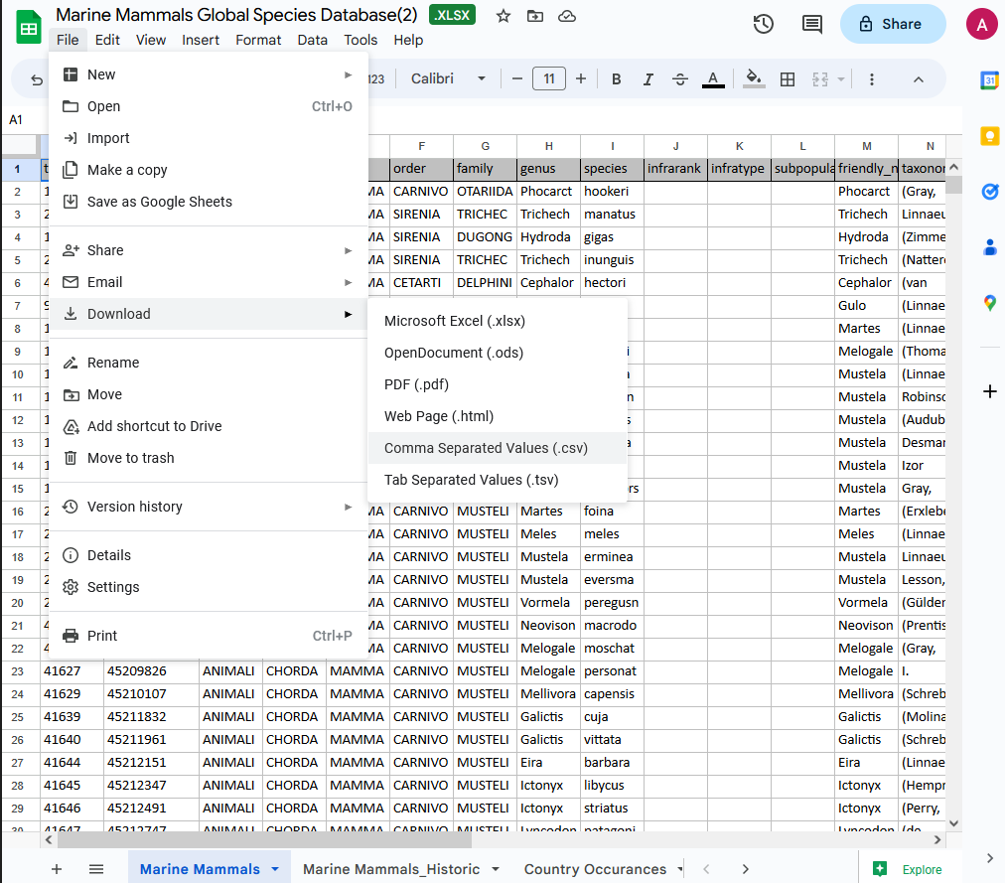

Using a script within MySQL we instruct the DDL to create our tables and relations in our MySQL database. We must also create views so we can confirm the attributes of each table is correct. 

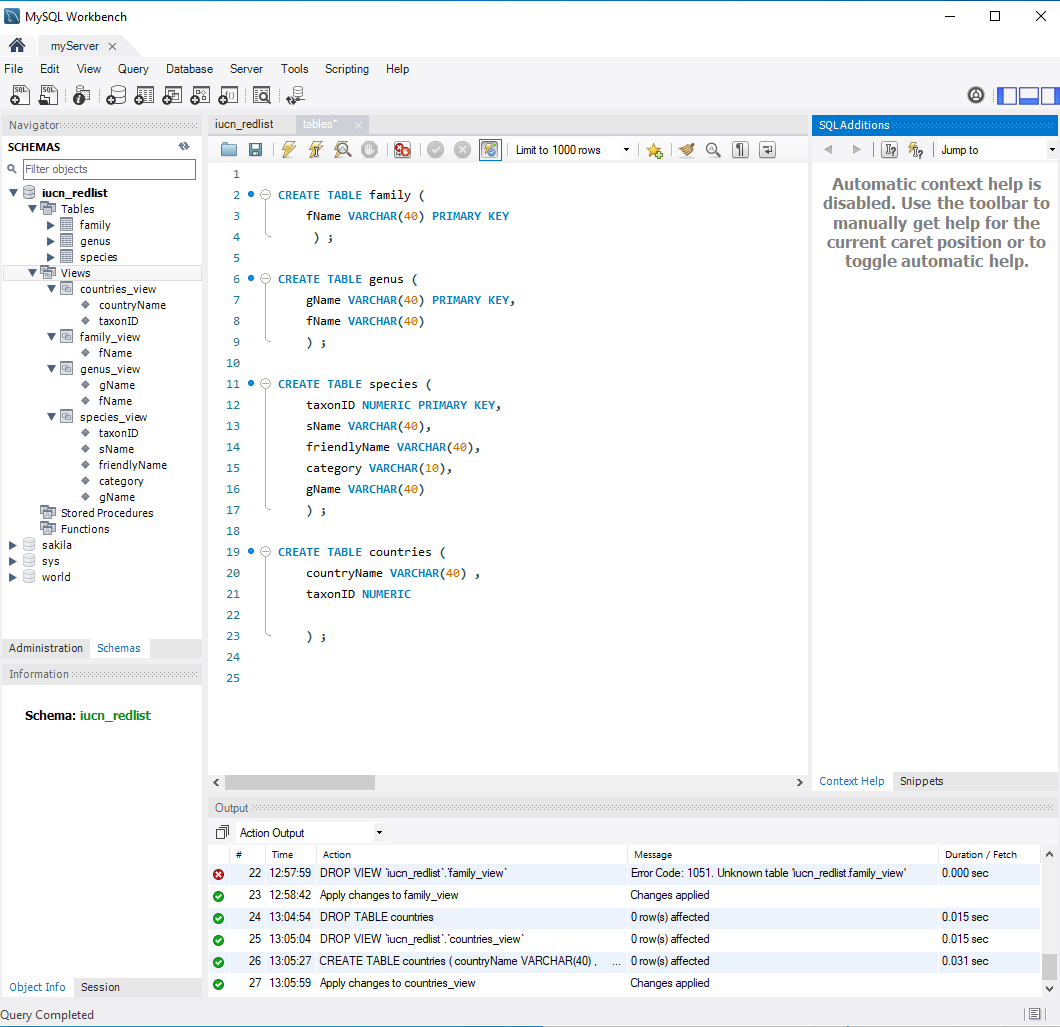

PHASE 2

Next, we will open our python editor, where the .csv files will be imported into created dataframes. Each dataframe will need to be modified and copied to give us the data, which we will export and import into the tables of the MySQL we created earlier. Depending on which tables dataframe we are constructing will depend on which .csv file will use to extract that attribute information.

The first step in this phase will be to import .csv files and construct dataframes. In our case we have imported the 'marine mammals' and 'country occurances' sheets.

Before importation we require a package pandas, and must import it. We will import Panda which is a data analysis and manipulation package. Using Pandas, we will create a dataframe for every table we need in our database.

In [2]:
import pandas as pd

The first dataframe was constructed by importing 'Marine Mammals.csv' using pandas pd.read_csv method. The dataframe was verified using .info() method.

In [3]:
mammals_data = pd.read_csv('Marine Mammals.csv')
mammals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   taxonid                187 non-null    int64  
 1   assessmentid           187 non-null    int64  
 2   kingdom                187 non-null    object 
 3   phylum                 187 non-null    object 
 4   class                  187 non-null    object 
 5   order                  187 non-null    object 
 6   family                 187 non-null    object 
 7   genus                  187 non-null    object 
 8   species                187 non-null    object 
 9   infrarank              0 non-null      float64
 10  infratype              0 non-null      float64
 11  subpopulation          0 non-null      float64
 12  friendly_name          187 non-null    object 
 13  taxonomic_authority    187 non-null    object 
 14  category               187 non-null    object 
 15  criter

Next, we will create copies of the attributes that we need for each table from mammals_data. We will also have to rename the column name to match our database as well as remove duplicates. Finally, export the table as a .csv file being sure to remove index values.

The first dataframe for table 'family' was created and stored into it all values from the 'family' attribute, as this table will only have one column of data in our database. We also must modify the dataframe 'family' by removing duplicates and renaming column 'family' to 'fName' as this is how we titled the column in MySQL. The dataframe 'family' was then exported as a .csv and will be imported into our database later. Finally, the .info() and .head() methods were called to confirm our dataframe.

In [4]:
family = mammals_data[['family']].copy()
family = family.drop_duplicates()
family = family.rename(columns={'family':'fName'})
family.to_csv('family.csv', index=False)
family.info()
family.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 165
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fName   16 non-null     object
dtypes: object(1)
memory usage: 256.0+ bytes


,fName
0,BALAENIDAE
4,BALAENOPTERIDAE
12,DELPHINIDAE
48,DUGONGIDAE
50,ESCHRICHTIIDAE


We will repeat this for the other tables we need for our database. The second dataframe for table 'genus' was created and stored into it all values from the 'family' and 'genus attributes, as this table will have these two columns of data in our database. We also must modify the dataframe 'genus' by removing duplicates and renaming column 'famly' to 'fName' and 'genus' to 'gName', as this is how we titled the column in MySQL. The dataframe 'genus' was then exported as a .csv and will be imported into our database later. Finally, the .info() and .head() methods were called to confirm our dataframe.

In [5]:
genus = mammals_data[['family','genus']].copy()
genus = genus.drop_duplicates()
genus = genus.rename(columns={'family':'fName', 'genus':'gName'})
genus.to_csv('genus.csv', index=False)
genus.info()
genus.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fName   116 non-null    object
 1   gName   116 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


,fName,gName
0,BALAENIDAE,Phocarctos
1,BALAENIDAE,Trichechus
2,BALAENIDAE,Hydrodamalis
4,BALAENOPTERIDAE,Cephalorhynchus
5,BALAENOPTERIDAE,Gulo


We will repeat this for the other tables we need for our database. The third dataframe for table 'species' was created and stored into it all values from the 'taxonid', 'species','friendly_name','category', and 'genus' attributes, as this table will have these columns of data in our database. We also must modify the dataframe 'species' by removing duplicates and renaming column 'taxonid' to 'taxonID', 'species' to 'sName','firendly_name' to 'friendlyName', 'category' will remain, and 'genus' to 'gName', as this is how we titled the columns in MySQL. The dataframe 'species' was then exported as a .csv and will be imported into our database later. Finally, the .info() and .head() methods were called to confirm our dataframe.

In [6]:
species = mammals_data[['taxonid','species','friendly_name','category','genus']].copy()
species = species.drop_duplicates()
species = species.rename(columns={'taxonid':'taxonID', 'species':'sName','friendly_name':'friendlyName','category':'category','genus':'gName'})
species.to_csv('species.csv', index=False)
species.info()
species.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   taxonID       187 non-null    int64 
 1   sName         187 non-null    object
 2   friendlyName  187 non-null    object
 3   category      187 non-null    object
 4   gName         187 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.8+ KB


,taxonID,sName,friendlyName,category,gName
0,1793,hookeri,Phocarctos hookeri,EN,Phocarctos
1,1794,manatus,Trichechus manatus,VU,Trichechus
2,2055,gigas,Hydrodamalis gigas,EX,Hydrodamalis
3,2057,inunguis,Trichechus inunguis,VU,Trichechus
4,2058,hectori,Cephalorhynchus hectori,EN,Cephalorhynchus


The last table needed requires the other .csv file to obtain country table data. We will have to repeat from the importation phase. First, importing 'Country Occurances.csv' to a new dataframe and then copying to a new table dataframe 'country', the attributes we need. The 'country' dataframe will then need to have its duplicates dropped as well as dropping any null values. 

In this instance we have an attribute that has at least two strings inside the column, in 'countryoccurenceslookup_value', starting with a string in the format "CD" or "CD-001", and following with the name of the country at varying string counts. This column can be split into two new columns by calling the countryoccurenceslookup_value index and splitting the string by its first white space and setting Expand to True, which allows the rendering of new columns, and putting them into new indexes.

In [7]:
countries_data = pd.read_csv('Country Occurances.csv')
country = countries_data[['countryoccurrencelookup_value','taxonid']].copy()

country = country.drop_duplicates()
country = country.dropna(how='any', axis=0)

country[['countrySymbol','countryName']] = country['countryoccurrencelookup_value'].str.split(" ",1, expand= True)
country.head()

country.info()
country.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6572 entries, 0 to 17824
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   countryoccurrencelookup_value  6572 non-null   object
 1   taxonid                        6572 non-null   int64 
 2   countrySymbol                  6572 non-null   object
 3   countryName                    6572 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.7+ KB


,countryoccurrencelookup_value,taxonid,countrySymbol,countryName
0,NE Niger,1793,NE,Niger
1,GH Ghana,1793,GH,Ghana
2,AO Angola,1793,AO,Angola
3,CM Cameroon,1793,CM,Cameroon
4,NA Namibia,1793,NA,Namibia


The last table dataframe can be finalized by creating a copy without the countryoccurrencelookup_value attribute. Then, renaming the attributes to match our database and finally exporting as a .csv.

In [8]:
country = country[['countryName','taxonid']].copy()
country = country.rename(columns={'countryName':'countryName','taxonid':'taxonID'})
country.to_csv('country.csv', index=False)
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6572 entries, 0 to 17824
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryName  6572 non-null   object
 1   taxonID      6572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 154.0+ KB


Finally, we then import those four exported dataframes into the MySQL database, simply using the built in import wizard within MySQL. We import by right clicking the table in the schema within MySQL and selecting the option and following all the default settings.

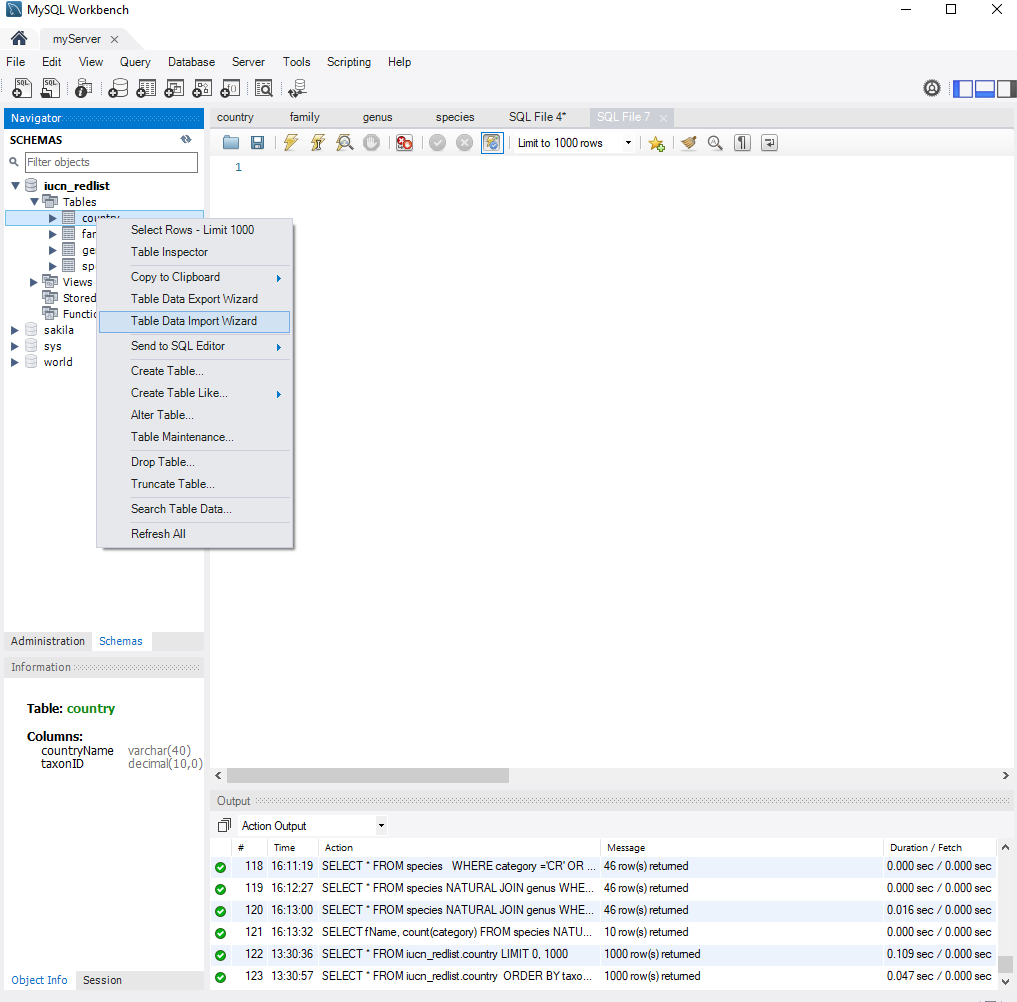

This will be repeated with the other .csv files. The family table, however, will need to have a setting changed to be able to import the data into one column, otherwise it tries to seperate the one column into two. The setting is opened by selecting the wrench icon and setting the field seperator to 'TAB'.

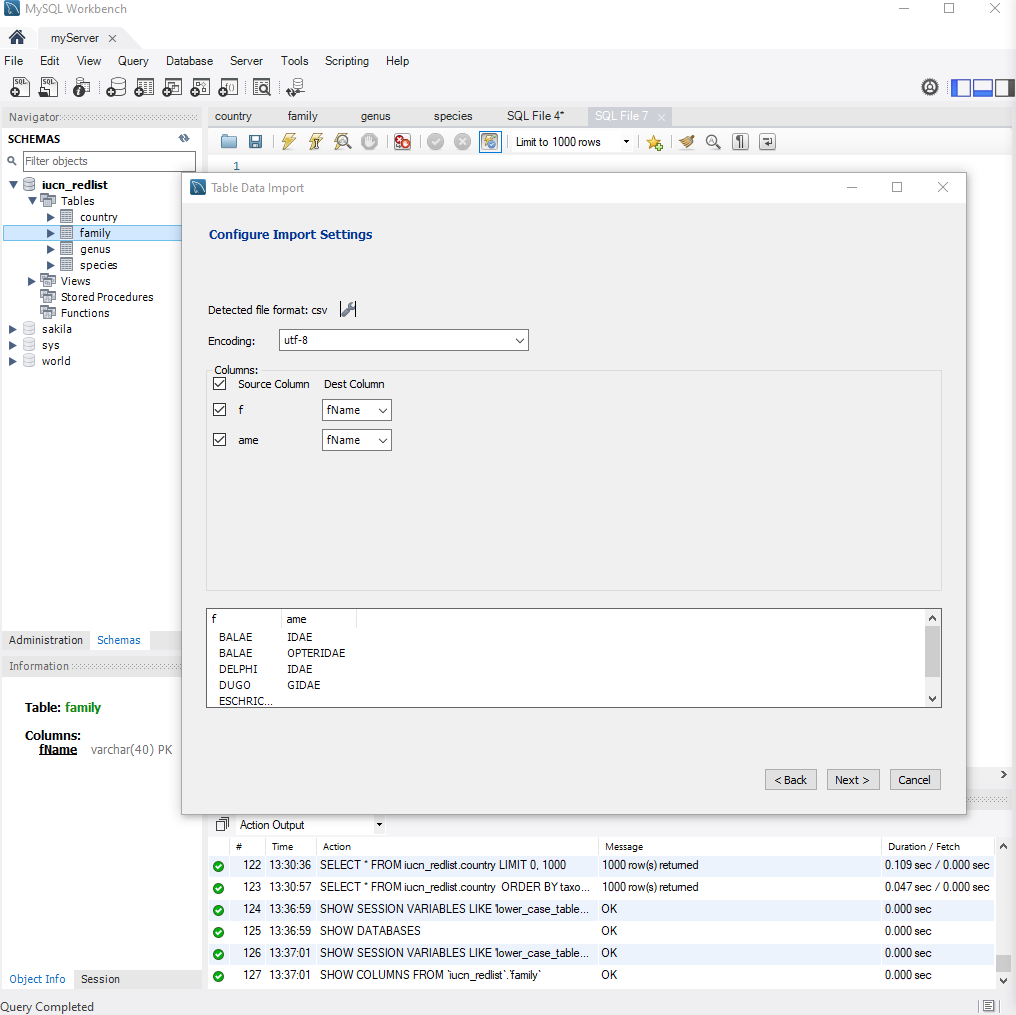

We will confirm tables are appropriate.

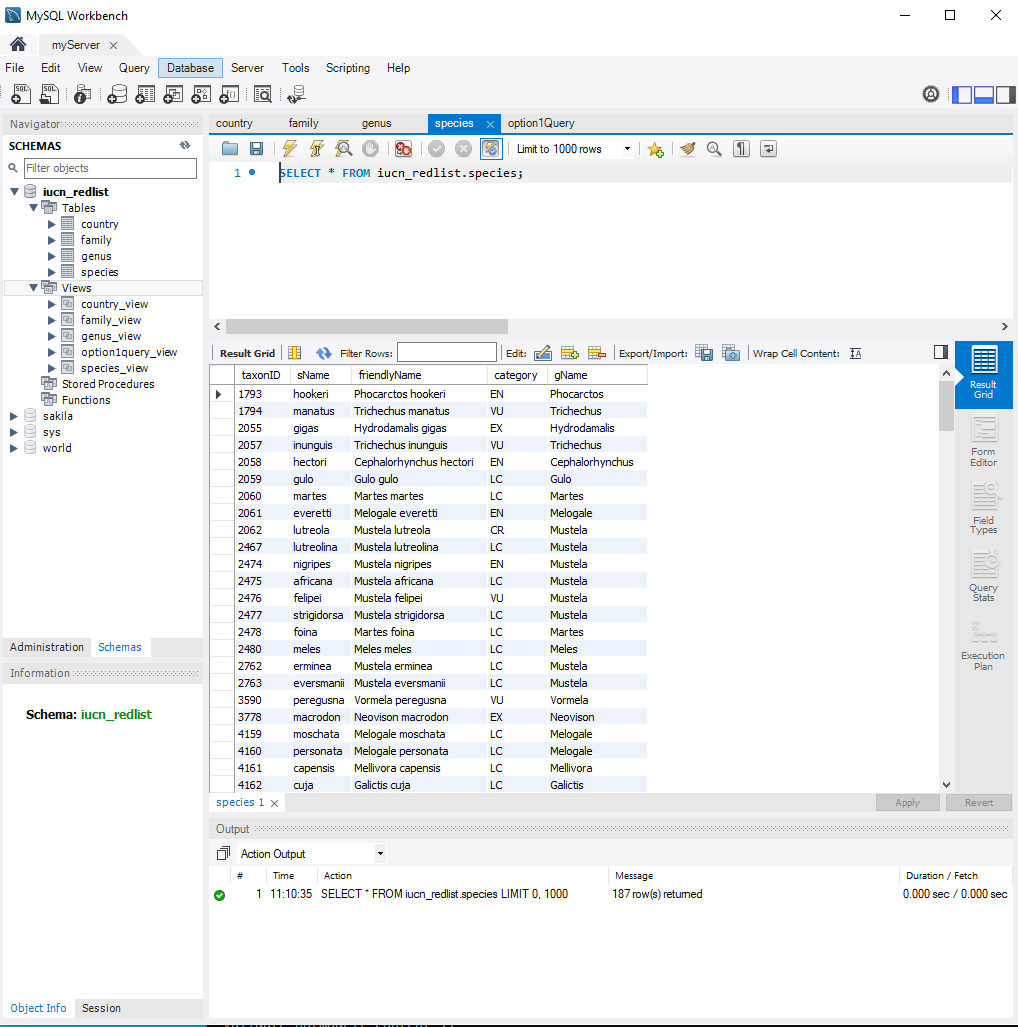

PHASE 3

Our goal is to Query the number of all threatened species for each family. We are also tasked with providing a pie chart to visualize this data. It is noted that a threatend species is one with the category of 'CR', 'EN', or 'VU'. 

Our first task will be to create a query that will find a count of all threatened species within each family. This was done within MySQL query tab.

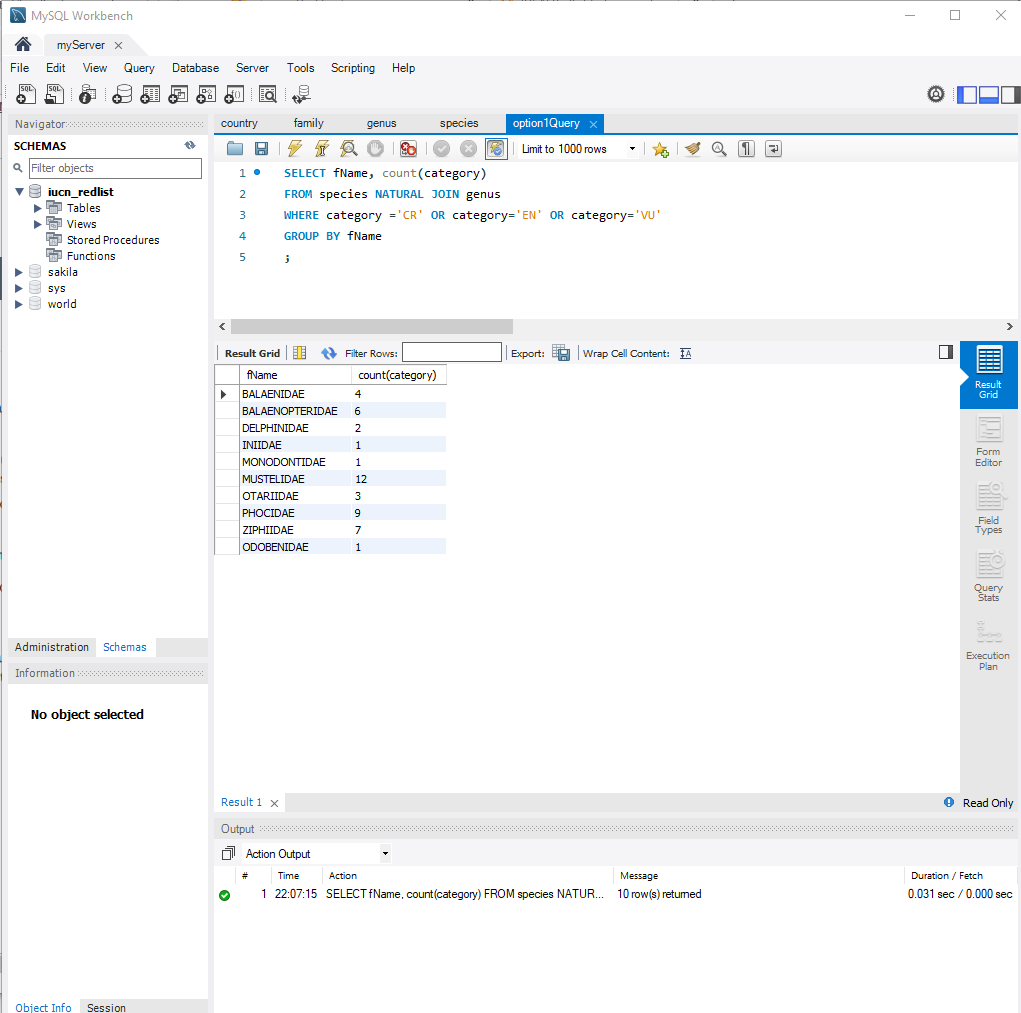

Apparently, in order to be able to import this query as a dataframe within this notebook, I will first need to create this query as a view. Then, the view can be exported as a .csv file, and imported as a dataframe within this notebook.

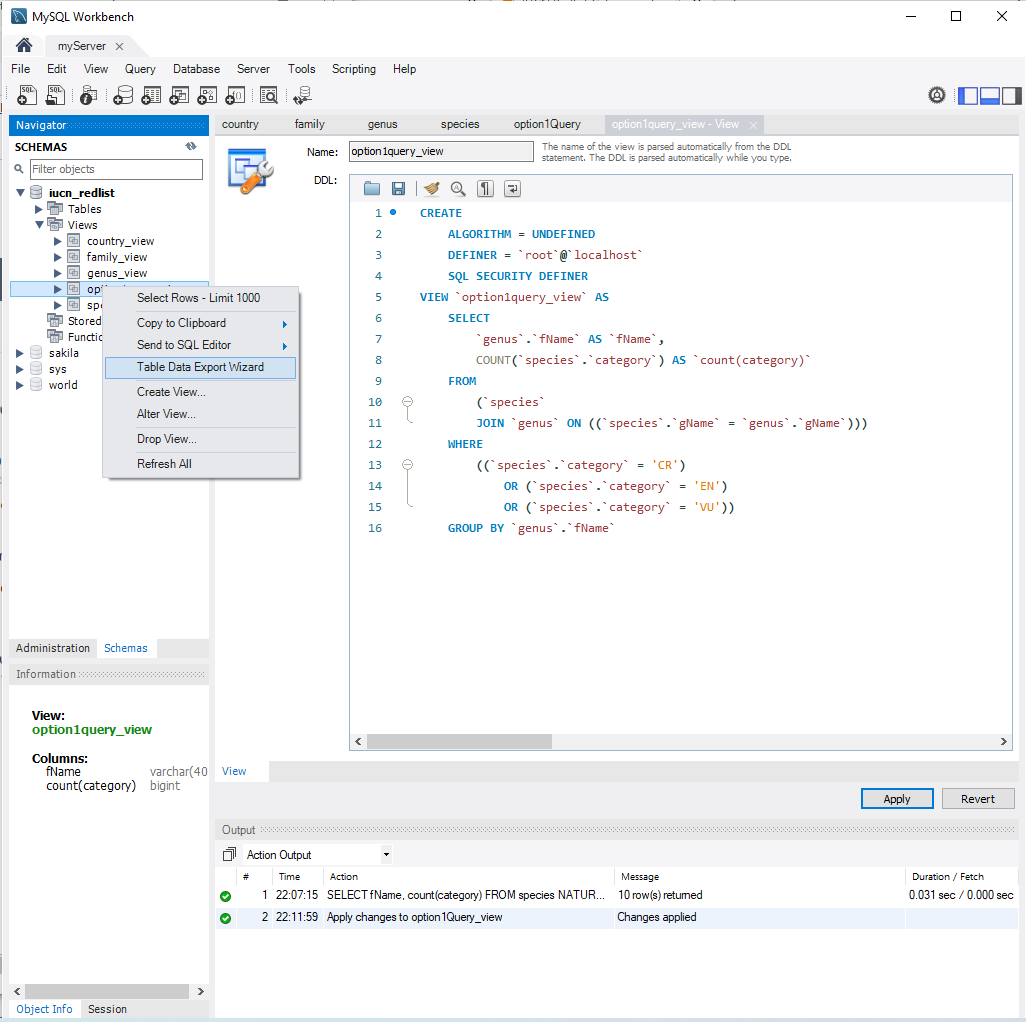

After this file is exported, we will import those .csv files as a new dataframe so that we can create the pie chart.

In [9]:
import pandas as pd
countPerFamily = pd.read_csv('option1query_view.csv')
countPerFamily.head(10)

,fName,count(category)
0,BALAENIDAE,4
1,BALAENOPTERIDAE,6
2,DELPHINIDAE,2
3,INIIDAE,1
4,MONODONTIDAE,1
5,MUSTELIDAE,12
6,OTARIIDAE,3
7,PHOCIDAE,9
8,ZIPHIIDAE,7
9,ODOBENIDAE,1


Finally, we will use a package called matplotlib.pyplot that allows us to build many different plots. In this case we will be crafting a pie chart. Creating and assigning two variables with each column will allow us to create a plot with fig, ax = plt.subplots(), and assign those variables with ax.pie. Finally, autopct='%1.1%%' is used to automatically assign percentage values to each component of the chart.

([<matplotlib.patches.Wedge at 0x1f1026cd340>,
 [Text(1.0592090145724589, 0.2967764536624172, 'BALAENIDAE'),
  Text(0.6343483488390105, 0.8986668861848762, 'BALAENOPTERIDAE'),
  Text(0.07506664967535517, 1.097435646453366, 'DELPHINIDAE'),
  Text(-0.14978332315531706, 1.0897545393824015, 'INIIDAE'),
  Text(-0.2967764598605611, 1.0592090128358203, 'MONODONTIDAE'),
  Text(-1.0089324334399592, 0.4382411947237759, 'MUSTELIDAE'),
  Text(-0.8986668861848764, -0.6343483488390103, 'OTARIIDAE'),
  Text(-0.14978332953220397, -1.0897545385059184, 'PHOCIDAE'),
  Text(0.8986668564888858, -0.6343483909086429, 'ZIPHIIDAE'),
  Text(1.0974356416214441, -0.0750667203155267, 'ODOBENIDAE')],
 [Text(0.5777503715849774, 0.1618780656340457, '8.7%'),
  Text(0.34600819027582386, 0.4901819379190233, '13.0%'),
  Text(0.04094544527746645, 0.598601261701836, '4.3%'),
  Text(-0.08169999444835475, 0.5944115669358553, '2.2%'),
  Text(-0.1618780690148515, 0.5777503706377201, '2.2%'),
  Text(-0.5503267818763413, 0.23904

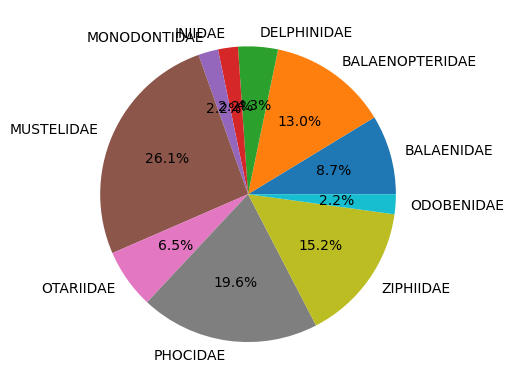

In [10]:
import matplotlib.pyplot as plt
labels = countPerFamily['fName'].values
sizes =  countPerFamily['count(category)'].values

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels, autopct='%1.1f%%')